<a href="https://colab.research.google.com/github/BerivanAyaz/Pusula_Berivan_Ayaz/blob/main/Pusula_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
### **Loading the Dataset and Necessary Imports**

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os


# Refreshing the connection to resolve any possible connection issues
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive connected successfully.")
except Exception as e:
    print(f"An error occurred while connecting to Google Drive: {e}")

# Identifying and checking the file path
file_path = '/content/drive/MyDrive/pusula/Talent_Academy_Case_DT_2025.xlsx'

# section for debugging possible errors
parent_folder = os.path.dirname(file_path)
print(f"\n'{parent_folder}' checking the contents of the folder...")
try:
    file_list = os.listdir(parent_folder)
    print("Folder content:")
    for name in file_list:
        print(f"- {name}")
except FileNotFoundError:
    print(f"ERROR: '{parent_folder}' folder not found. Please check ('/content/drive/MyDrive/pusula/') the folder path.")


# Checking and reading data
if os.path.exists(file_path):
    print(f"\nFile found at path '{file_path}'. Reading data...")
    try:
        df = pd.read_excel(file_path, sheet_name=0)
        print("\nDataset loaded successfully!")

        print("\nFirst 5 Rows of the Data Set:")
        print(df.head())

    except Exception as e:
        print(f"\nAn error occurred while reading the file in Pandas: {e}")
        print("Check if the file is corrupt or in the correct format.")

else:
    print(f"\nERROR: File not found at path '{file_path}'!")


Mounted at /content/drive
Google Drive connected successfully.

'/content/drive/MyDrive/pusula' checking the contents of the folder...
Folder content:
- Talent_Academy_Case_DT_2025.xlsx
- Pusula_Case_Study.ipynb

File found at path '/content/drive/MyDrive/pusula/Talent_Academy_Case_DT_2025.xlsx'. Reading data...

Dataset loaded successfully!

First 5 Rows of the Data Set:
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi, Myastenia gravis...   

           

In [9]:
### **Exploratory Data Analysis (EDA) - Overview and Health Check**


# --- Overview of the Data Set ---

# 1. The size of the dataset (number of rows, number of columns)
print("--- Dataset Size ---")
print(f"Number of Observations (Rows): {df.shape[0]}")
print(f"Number of Features (Columns): {df.shape[1]}")
print("-" * 25)


# 2. The data types of the columns and the counts of non-null values
print("\n--- Column Data Types and Null Values ---")
df.info()
print("-" * 25)


# 3. The number and percentage of missing data by column
print("\n--- Missing Data Analysis ---")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_info = pd.concat([missing_data, missing_percent], axis=1, keys=['Number of Missing Data', 'Percentage of Missing Data (%)'])
print(missing_info[missing_info['Number of Missing Data'] > 0].sort_values(by='Number of Missing Data', ascending=False))
print("-" * 25)


# 4. Basic statistical information for numerical columns (mean, min, max, etc.).
print("\n--- Descriptive Statistics for Numerical Variables ---")
print(df.describe())
print("-" * 25)


# 5. The number of rows that are exactly the same
print("\n--- Number of Rows that are Exactly the Same ---")
print(f"There are a total of {df.duplicated().sum()} rows that are exactly the same.")
print("-" * 25)


--- Dataset Size ---
Number of Observations (Rows): 2235
Number of Features (Columns): 13
-------------------------

--- Column Data Types and Null Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB
------

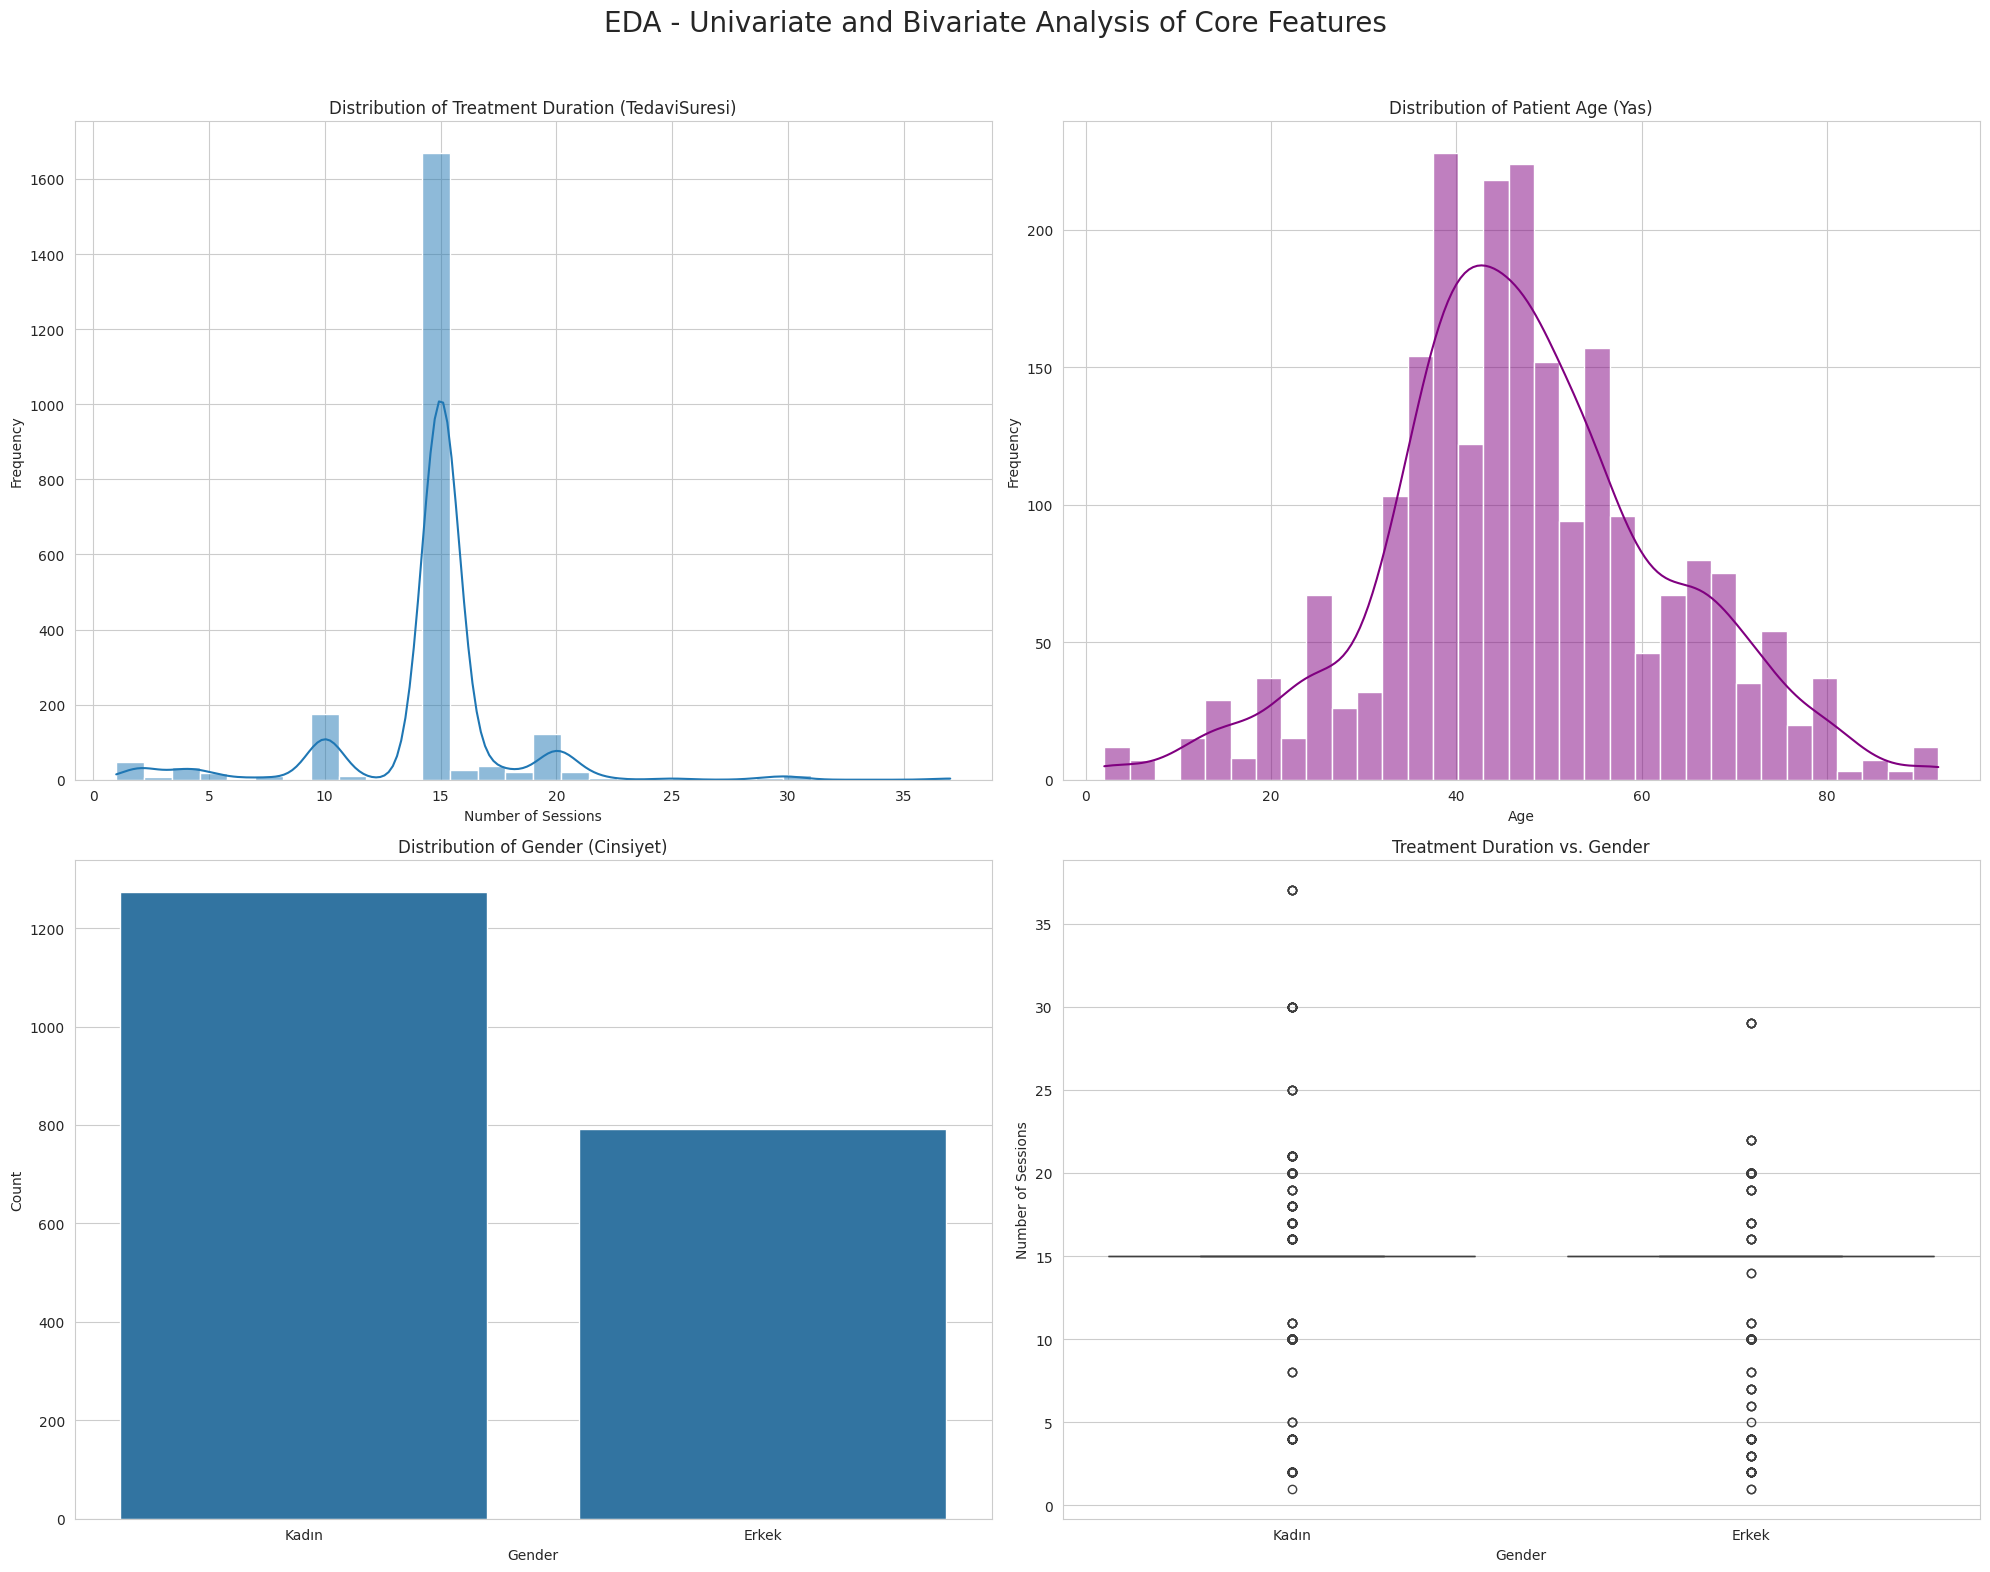

In [10]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(20, 16))
plt.suptitle('EDA - Univariate and Bivariate Analysis of Core Features', fontsize=20)


# --- 1. Target Variable Analysis: TedaviSuresi ---
temp_tedavi_suresi = df['TedaviSuresi'].str.replace(' Seans', '').astype(int)

plt.subplot(2, 2, 1)
sns.histplot(temp_tedavi_suresi, kde=True, bins=30)
plt.title('Distribution of Treatment Duration (TedaviSuresi)')
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')


# --- 2. Age Analysis ---
plt.subplot(2, 2, 2)
sns.histplot(df['Yas'], kde=True, color='purple')
plt.title('Distribution of Patient Age (Yas)')
plt.xlabel('Age')
plt.ylabel('Frequency')


# --- 3. Gender Analysis ---
plt.subplot(2, 2, 3)
sns.countplot(x='Cinsiyet', data=df[df['Cinsiyet'].notna()], order=df['Cinsiyet'].value_counts().index)
plt.title('Distribution of Gender (Cinsiyet)')
plt.xlabel('Gender')
plt.ylabel('Count')


# --- 4. Relationship between Gender and Treatment Duration ---
temp_df = pd.DataFrame({'Cinsiyet': df['Cinsiyet'], 'TedaviSuresi_Clean': temp_tedavi_suresi})
plt.subplot(2, 2, 4)
sns.boxplot(x='Cinsiyet', y='TedaviSuresi_Clean', data=temp_df[temp_df['Cinsiyet'].notna()])
plt.title('Treatment Duration vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Sessions')

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()